### Computing autocorrelation time

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import importlib
# import ising_analysis
# importlib.reload(ising_analysis)

In [92]:
# Load Convolutional RBM (CRBM) data
data_correlated_CRBM_L10 = np.loadtxt("./data/L_10_T_2.4_kernelDims_2-2_no_symmetries.dat")[:,0][20000:]
data_correlated_CRBM_L20 = np.loadtxt("./data/L_20_T_2.4_kernelDims_2-2_no_symmetries.dat")[:,0][20000:]
data_correlated_CRBM_L30 = np.loadtxt("./data/L_30_T_2.4_kernelDims_2-2_no_symmetries.dat")[:,0][20000:]
data_correlated_CRBM_L40 = np.loadtxt("./data/L_40_T_2.4_kernelDims_2-2_no_symmetries.dat")[:,0][20000:]
data_correlated_CRBM_L50 = np.loadtxt("./data/L_50_T_2.4_kernelDims_2-2_no_symmetries.dat")[:,0][20000:]
# data_correlated_CRBM_L128 = np.loadtxt("./data/L_128_T_2.4_kernelDims_2-2_no_symmetries.dat")[:,0][20000:]
# data_correlated_CRBM_L256 = np.loadtxt("./data/L_256_T_2.4_kernelDims_2-2_no_symmetries.dat")[:,0][20000:]

CRBM_steps = np.arange(data_correlated_CRBM_L10.shape[0])

In [93]:
# # Load single spin-flip MC data
data_correlated_MC_L10 = np.loadtxt("./data/L_10_T_2.4_seed_0_NN.dat")[:,0][20000:]
data_correlated_MC_L20 = np.loadtxt("./data/L_20_T_2.4_seed_0_NN.dat")[:,0][20000:]
data_correlated_MC_L30 = np.loadtxt("./data/L_30_T_2.4_seed_0_NN.dat")[:,0][20000:]
data_correlated_MC_L40 = np.loadtxt("./data/L_40_T_2.4_seed_0_NN.dat")[:,0][20000:]
data_correlated_MC_L50 = np.loadtxt("./data/L_50_T_2.4_seed_0_NN.dat")[:,0][20000:]
# data_correlated_MC_L128 = np.loadtxt("./data/L_128_T_2.4_seed_0_NN.dat")[:,0][20000:]
# data_correlated_MC_L256 = np.loadtxt("./data/L_256_T_2.4_seed_0_NN.dat")[:,0][20000:]

MC_steps = np.arange(data_correlated_MC_L10.shape[0])

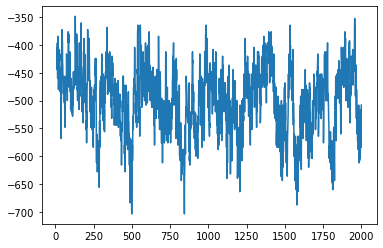

In [104]:
plt.plot(MC_steps[10:2000],data_correlated_MC_L20[10:2000])

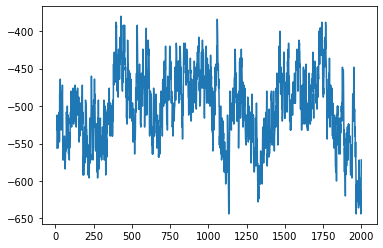

In [105]:
plt.plot(CRBM_steps[10:2000],data_correlated_CRBM_L20[10:2000])

#### As part of our computation of the integrated autocorrelation time, we will need to compute the normalized autocorrelation function:

$$ \rho(t) = \frac{c(t)}{c(0)} = \frac{\frac{1}{N-t}\sum_{i=1}^{N-t}{X_{i}X_{i+t}-{\left\langle{X}\right\rangle^2}}}{\left\langle{X^2}\right\rangle-{\left\langle{X}\right\rangle^2}} \sim e^{-\frac{t}{\tau_\mathrm{exp}}} $$

In [74]:
def autocorrelation(data):
    '''Computes normalized autocorrelation function of sample data for each time'''
    N = data.shape[0]
    _autocorrelation = np.zeros(N)
    for Δt in range(N-1): # let the time separation be all possible distances
        c0 = np.mean(data[:N - Δt]**2) - np.mean(data[:N - Δt])**2 #Variance at t0
        ct = np.mean(data[:N - Δt]*data[Δt:]) - np.mean(data[:N - Δt])*np.mean(data[Δt:]) # unnormalized autocorrelation fn.
        _autocorrelation[Δt] = ct/c0 # normalized autocorrelation function for this 'radius' (actually time separation)
    return _autocorrelation

def autocorrelation_function(time,scale,autocorrelation_time):
    '''exponential form of the autocorrelation function'''
    return scale*np.exp(-time/autocorrelation_time)

In [75]:
np.mean(data_correlated_CRBM_L10),np.mean(data_correlated_MC_L10)

(-131.25065, -131.29465)

In [76]:
# Compute normalized autocorrelation function for each system size
_autocorrelation_CRBM_L10 = autocorrelation(data_correlated_CRBM_L10)
_autocorrelation_CRBM_L20 = autocorrelation(data_correlated_CRBM_L20)
_autocorrelation_CRBM_L30 = autocorrelation(data_correlated_CRBM_L30)
_autocorrelation_CRBM_L40 = autocorrelation(data_correlated_CRBM_L40)
_autocorrelation_CRBM_L50 = autocorrelation(data_correlated_CRBM_L50)
# _autocorrelation_CRBM_L128 = autocorrelation(data_correlated_CRBM_L128)
# _autocorrelation_CRBM_L256 = autocorrelation(data_correlated_CRBM_L256)

_autocorrelation_MC_L10 = autocorrelation(data_correlated_MC_L10)
_autocorrelation_MC_L20 = autocorrelation(data_correlated_MC_L20)
_autocorrelation_MC_L30 = autocorrelation(data_correlated_MC_L30)
_autocorrelation_MC_L40 = autocorrelation(data_correlated_MC_L40)
_autocorrelation_MC_L50 = autocorrelation(data_correlated_MC_L50)
# _autocorrelation_MC_L128 = autocorrelation(data_correlated_MC_L128)
# _autocorrelation_MC_L256 = autocorrelation(data_correlated_MC_L256)

# Eliminate nans (there's usually just a few)
_autocorrelation_CRBM_L10 = np.ma.masked_array(_autocorrelation_CRBM_L10,~np.isfinite(_autocorrelation_CRBM_L10)).filled(0)
_autocorrelation_CRBM_L20 = np.ma.masked_array(_autocorrelation_CRBM_L20,~np.isfinite(_autocorrelation_CRBM_L20)).filled(0)
_autocorrelation_CRBM_L30 = np.ma.masked_array(_autocorrelation_CRBM_L30,~np.isfinite(_autocorrelation_CRBM_L30)).filled(0)
_autocorrelation_CRBM_L40 = np.ma.masked_array(_autocorrelation_CRBM_L40,~np.isfinite(_autocorrelation_CRBM_L40)).filled(0)
_autocorrelation_CRBM_L50 = np.ma.masked_array(_autocorrelation_CRBM_L50,~np.isfinite(_autocorrelation_CRBM_L50)).filled(0)
# _autocorrelation_CRBM_L128 = np.ma.masked_array(_autocorrelation_CRBM_L128,~np.isfinite(_autocorrelation_CRBM_L128)).filled(0)
# _autocorrelation_CRBM_L256 = np.ma.masked_array(_autocorrelation_CRBM_L256,~np.isfinite(_autocorrelation_CRBM_L256)).filled(0)

_autocorrelation_MC_L10 = np.ma.masked_array(_autocorrelation_MC_L10,~np.isfinite(_autocorrelation_MC_L10)).filled(0)
_autocorrelation_MC_L20 = np.ma.masked_array(_autocorrelation_MC_L20,~np.isfinite(_autocorrelation_MC_L20)).filled(0)
_autocorrelation_MC_L30 = np.ma.masked_array(_autocorrelation_MC_L30,~np.isfinite(_autocorrelation_MC_L30)).filled(0)
_autocorrelation_MC_L40 = np.ma.masked_array(_autocorrelation_MC_L40,~np.isfinite(_autocorrelation_MC_L40)).filled(0)
_autocorrelation_MC_L50 = np.ma.masked_array(_autocorrelation_MC_L50,~np.isfinite(_autocorrelation_MC_L50)).filled(0)
# _autocorrelation_MC_L128 = np.ma.masked_array(_autocorrelation_MC_L128,~np.isfinite(_autocorrelation_MC_L128)).filled(0)
# _autocorrelation_MC_L256 = np.ma.masked_array(_autocorrelation_MC_L256,~np.isfinite(_autocorrelation_MC_L256)).filled(0)

# _autocorrelation_rejection = np.ma.masked_array(_autocorrelation_rejection, ~np.isfinite(_autocorrelation_rejection)).filled(0)
# _autocorrelation_direct = np.ma.masked_array(_autocorrelation_direct, ~np.isfinite(_autocorrelation_direct)).filled(0)

# Time separations
time_separation_CRBM = np.arange(_autocorrelation_CRBM_L10.shape[0])
time_separation_MC = np.arange(_autocorrelation_MC_L10.shape[0])

<ipython-input-74-3fa33d3506a9>:8: RuntimeWarning: invalid value encountered in double_scalars
  _autocorrelation[Δt] = ct/c0 # normalized autocorrelation function for this 'radius' (actually time separation)


In [77]:
# Fit autocorrelation to exponential form for all time separations
popt_CRBM_L10, perr_CRBM_L10 = curve_fit(autocorrelation_function, time_separation_CRBM, _autocorrelation_CRBM_L10)
popt_CRBM_L20, perr_CRBM_L20 = curve_fit(autocorrelation_function, time_separation_CRBM, _autocorrelation_CRBM_L20)
popt_CRBM_L30, perr_CRBM_L30 = curve_fit(autocorrelation_function, time_separation_CRBM, _autocorrelation_CRBM_L30)
popt_CRBM_L40, perr_CRBM_L30= curve_fit(autocorrelation_function, time_separation_CRBM, _autocorrelation_CRBM_L40)
popt_CRBM_L50, perr_CRBM_L50 = curve_fit(autocorrelation_function, time_separation_CRBM, _autocorrelation_CRBM_L50)
# popt_CRBM_L128, perr_CRBM_L128 = curve_fit(autocorrelation_function, time_separation_CRBM, _autocorrelation_CRBM_L128)
# popt_CRBM_L256, perr_CRBM_L256 = curve_fit(autocorrelation_function, time_separation_CRBM, _autocorrelation_CRBM_L256)

popt_MC_L10, perr_MC_L10 = curve_fit(autocorrelation_function, time_separation_MC, _autocorrelation_MC_L10)
popt_MC_L20, perr_MC_L20 = curve_fit(autocorrelation_function, time_separation_MC, _autocorrelation_MC_L20)
popt_MC_L30, perr_MC_L30 = curve_fit(autocorrelation_function, time_separation_MC, _autocorrelation_MC_L30)
popt_MC_L40, perr_MC_L40= curve_fit(autocorrelation_function, time_separation_MC, _autocorrelation_MC_L40)
popt_MC_L50, perr_MC_L50 = curve_fit(autocorrelation_function, time_separation_MC, _autocorrelation_MC_L50)
# popt_MC_L128, perr_MC_L128 = curve_fit(autocorrelation_function, time_separation_MC, _autocorrelation_MC_L128)
# popt_MC_L256, perr_MC_L256 = curve_fit(autocorrelation_function, time_separation_MC, _autocorrelation_MC_L256)

#### The integrated autocorrelation is obtained by summing the autocorrelation function over all possible time separations:

$$ \tau_\mathrm{int}=\sum_t \frac{C(t)}{C(0)}$$

In [78]:
def integrated_autocorrelation_time(data):
    data_mean_squared = np.mean(data)**2
    variance = np.mean(data**2) - data_mean_squared # c(0)
    τ_int_auto = 0.0
    N = data.shape[0]
    for Δt in range(N):
#         τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - data_mean_squared
        τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - np.mean(data[:N - Δt])*np.mean(data[Δt:])
    return τ_int_auto/variance

In [79]:
def integrated_autocorrelation_time(data):
    data_mean_squared = np.mean(data)**2
    variance = np.mean(data**2) - data_mean_squared # c(0)
    τ_int_auto = 0.0
    N = data.shape[0]
    for Δt in range(N):
#         τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - data_mean_squared
        τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - np.mean(data[:N - Δt])*np.mean(data[Δt:])
    return τ_int_auto/variance

In [80]:
# autocorrelation_time_int = integrated_autocorrelation_time(data_correlated_rejection) # I think we need to truncate this

In [81]:
# fig,ax = plt.subplots(1,2,figsize=(10,4.5), dpi=100,sharey=True,tight_layout=True)
# plt.subplots_adjust(wspace=0.02)
# ax[0].plot(time_separation_CRBM, _autocorrelation_CRBM_L20,'-',color='tab:blue',label='CRBM') # autocorrelation function
# ax[0].plot(time_separation_MC, _autocorrelation_MC_L20,'-',color='tab:pink',label='MC') # autocorrelation function

# ax[0].set_xlim((-1,400))
# ax[0].set_ylim(-0.05,1.05)
# # ax[0].set_yscale('linear')
# # ax[0].set_ylabel(r'Autocorrelation function');
# # ax[0].set_xlabel(r'Time step');
# ax[0].tick_params(direction='in')
# ax[0].legend(frameon=False)
# ax[0].annotate(r"$\tau_{\rm{CRBM}}=%.4f$"%(popt_CRBM_L20[1]),(0.20+0.06,0.58+0.15),
#                 xycoords='figure fraction',fontsize=12)
# ax[0].annotate(r"$\tau_{\rm{MC}}=%.4f$"%(popt_MC_L20[1]),(0.20+0.06,0.58+0.09),
#                 xycoords='figure fraction',fontsize=12)

# # ax[1].plot(time_separation, _autocorrelation_rejection,'-',color='tab:green',label='Rejection') # autocorrelation function
# # ax[1].plot(time_separation, _autocorrelation_direct,'-',color='tab:orange',label='Direct') # autocorrelation function

# # ax[1].set_xlim((-2.5,40))
# # ax[1].set_ylim(-0.05,1)
# # ax[1].set_yscale('linear')
# # ax[1].set_ylabel(r'');
# # ax[1].set_xlabel(r'Time step');
# # ax[1].tick_params(direction='in')
# # ax[1].legend(frameon=False)
# # ax[1].annotate(r"$\tau_{\rm{Rejection}}=%.4f$"%(popt_rejection[1]),(0.655+0.06,0.58+0.15),
# #                 xycoords='figure fraction',fontsize=12)
# # ax[1].annotate(r"$\tau_{\rm{Direct}}=%.4f$"%(popt_direct[1]),(0.655+0.06,0.58+0.09),
# #                 xycoords='figure fraction',fontsize=12)

# # plt.savefig("act_comparison_T4.00_mc_rbm_combined.pdf",dpi=300)
# # plt.savefig("act_comparison_T4.00_mc_rbm_combined.png",dpi=300)

# plt.show()

#### We can obtain the autocorrelation time from a fitting of: $$Ae^{-t/\tau_{exp}}$$

In [82]:
print("CRBM:")
print("τ_auto: {}".format(popt_CRBM_L10[1])) # from fitting
# print("τ_auto: {}".format(popt_CRBM_L8[1])) # from fitting
# print("τ_auto: {}".format(popt_CRBM_L16[1])) # from fitting
# print("τ_auto: {}".format(popt_CRBM_L32[1])) # from fitting
# print("τ_auto: {}".format(popt_CRBM_L64[1])) # from fitting
# print("τ_auto: {}".format(popt_CRBM_L128[1])) # from fitting
# print("τ_auto: {}".format(popt_CRBM_L256[1])) # from fitting

print("\n")

print("MC:")
print("τ_auto: {}".format(popt_MC_L10[1])) # from fitting
# print("τ_auto: {}".format(popt_MC_L8[1])) # from fitting
# print("τ_auto: {}".format(popt_MC_L16[1])) # from fitting
# print("τ_auto: {}".format(popt_MC_L32[1])) # from fitting
# print("τ_auto: {}".format(popt_MC_L64[1])) # from fitting
# print("τ_auto: {}".format(popt_MC_L128[1])) # from fitting
# print("τ_auto: {}".format(popt_MC_L256[1])) # from fitting

CRBM:
τ_auto: 78.31434607598193


MC:
τ_auto: 10.78303531139859


In [83]:
# Define arrays of autocorrelation times for plotting
# τs_CRBM = np.array([popt_CRBM_L4[1],popt_CRBM_L8[1],popt_CRBM_L16[1],popt_CRBM_L32[1],popt_CRBM_L64[1],popt_CRBM_L128[1],popt_CRBM_L256[1]])
# τs_MC = np.array([popt_MC_L4[1],popt_MC_L8[1],popt_MC_L16[1],popt_MC_L32[1],popt_MC_L64[1],popt_MC_L128[1],popt_MC_L256[1]])

τs_CRBM = np.array([popt_CRBM_L10[1],popt_CRBM_L20[1],popt_CRBM_L30[1],popt_CRBM_L40[1],popt_CRBM_L50[1]])
τs_MC = np.array([popt_MC_L10[1],popt_MC_L20[1],popt_MC_L30[1],popt_MC_L40[1],popt_MC_L50[1]])

Ls = [10*i for i in range(1,6)]

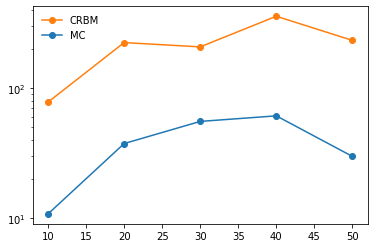

In [103]:
# fig,ax = plt.subplots(1,2,figsize=(10,4.5), dpi=100,sharey=True,tight_layout=True)
# plt.subplots_adjust(wspace=0.02)

plt.plot(Ls,τs_CRBM,marker='o',label="CRBM",color="tab:orange")
plt.plot(Ls,τs_MC,marker='o',label="MC",color="tab:blue")
plt.yscale("log")
plt.legend(frameon=False)
# ax[0].plot(time_separation, _autocorrelation_rejection,'-',color='tab:blue',label='Rejection') # autocorrelation function
# ax[0].plot(time_separation, _autocorrelation_direct,'-',color='tab:pink',label='Direct') # autocorrelation function

# ax[0].set_xlim((-2.5,40))
# ax[0].set_ylim(-0.05,1)
# ax[0].set_yscale('linear')
# ax[0].set_ylabel(r'Autocorrelation function');
# ax[0].set_xlabel(r'Time step');
# ax[0].tick_params(direction='in')
# ax[0].legend(frameon=False)
# ax[0].annotate(r"$\tau_{\rm{Rejection}}=%.4f$"%(popt_rejection[1]),(0.20+0.06,0.58+0.15),
#                 xycoords='figure fraction',fontsize=12)
# ax[0].annotate(r"$\tau_{\rm{Direct}}=%.4f$"%(popt_direct[1]),(0.20+0.06,0.58+0.09),
#                 xycoords='figure fraction',fontsize=12)

# ax[1].plot(time_separation, _autocorrelation_rejection,'-',color='tab:green',label='Rejection') # autocorrelation function
# ax[1].plot(time_separation, _autocorrelation_direct,'-',color='tab:orange',label='Direct') # autocorrelation function

# ax[1].set_xlim((-2.5,40))
# ax[1].set_ylim(-0.05,1)
# ax[1].set_yscale('linear')
# ax[1].set_ylabel(r'');
# ax[1].set_xlabel(r'Time step');
# ax[1].tick_params(direction='in')
# ax[1].legend(frameon=False)
# ax[1].annotate(r"$\tau_{\rm{Rejection}}=%.4f$"%(popt_rejection[1]),(0.655+0.06,0.58+0.15),
#                 xycoords='figure fraction',fontsize=12)
# ax[1].annotate(r"$\tau_{\rm{Direct}}=%.4f$"%(popt_direct[1]),(0.655+0.06,0.58+0.09),
#                 xycoords='figure fraction',fontsize=12)

# plt.savefig("act_comparison_T4.00_mc_rbm_combined.pdf",dpi=300)
# plt.savefig("act_comparison_T4.00_mc_rbm_combined.png",dpi=300)

plt.show()